In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

In [3]:
data= pd.read_csv(URL1)
data.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [5]:
df= pd.read_csv(URL2)
df.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
#import os

In [7]:
#os.getcwd()

In [8]:
# Task1

In [9]:
y=data['Class'].to_numpy()

In [10]:
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [11]:
# Task 2

In [12]:
transform = preprocessing.StandardScaler()

In [13]:
x= transform.fit_transform(df)

In [14]:
x

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [15]:
# Task 3

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
Y_test.shape

(18,)

In [18]:
# Task 4

In [19]:
 Lr= LogisticRegression()

In [20]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [21]:
#Allows us to test parameters of classification algorithms and find the best one
logreg_cv= GridSearchCV(Lr, parameters, cv=10)

In [22]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [23]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

In [26]:
yhatlog=logreg_cv.predict(X_test)
confusion_matrix(Y_test,yhatlog)

array([[ 3,  3],
       [ 0, 12]], dtype=int64)

In [27]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

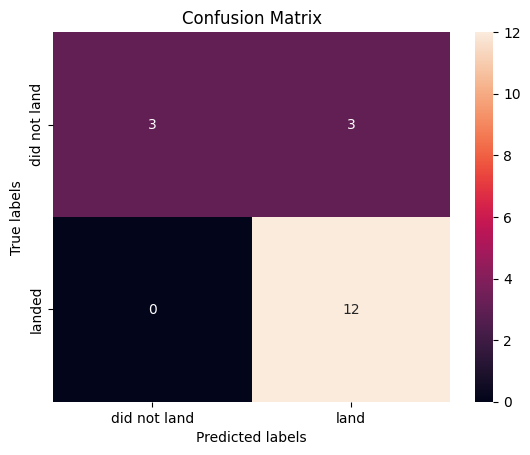

In [28]:
plot_confusion_matrix(Y_test,yhatlog)

In [29]:
# Task 6

In [30]:
Xs_train, Xs_test, Ys_train, Ys_test= train_test_split(x, y, test_size=0.2, random_state=20)

In [31]:
svm = SVC()

In [32]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [33]:
svm_cv= GridSearchCV(svm, parameters, cv=10)

In [34]:
svm_cv.fit(Xs_train, Ys_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [35]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8285714285714286


In [36]:
# Task 7

In [37]:
svm_cv.score(Xs_test, Ys_test)

0.9444444444444444

In [38]:
yhatsvm=svm_cv.predict(Xs_test)
confusion_matrix(Ys_test,yhatsvm)

array([[ 4,  1],
       [ 0, 13]], dtype=int64)

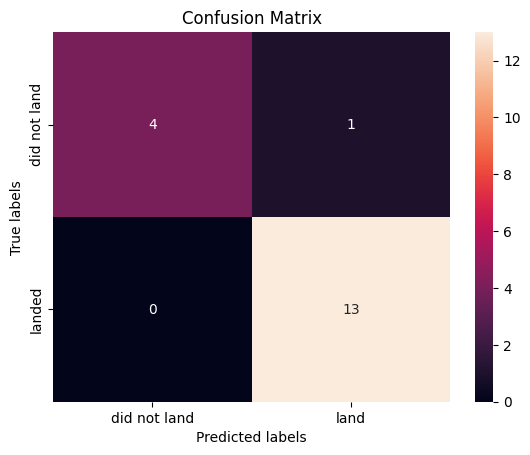

In [39]:
plot_confusion_matrix(Ys_test,yhatsvm)

In [40]:
# Task 8

In [41]:
Xt_train, Xt_test, Yt_train, Yt_test= train_test_split(x, y, test_size=0.2, random_state=112)

In [42]:
tree = DecisionTreeClassifier()

In [43]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [44]:
tree_cv= GridSearchCV(tree, parameters, cv=10)

In [45]:
tree_cv.fit(Xt_train, Yt_train)

E:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "E:\Python3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "E:\Python3\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parame

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [46]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9053571428571429


In [47]:
# Task 9

In [48]:
tree_cv.score(Xt_test, Yt_test)

0.8333333333333334

In [49]:
yhattree = tree_cv.predict(Xt_test)
confusion_matrix(Yt_test,yhattree)

array([[8, 2],
       [1, 7]], dtype=int64)

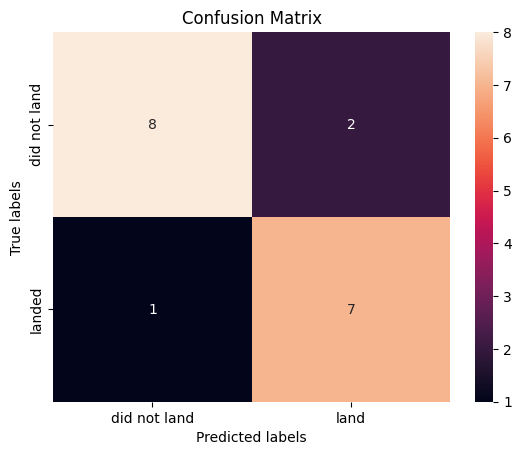

In [50]:
plot_confusion_matrix(Yt_test,yhattree)

In [51]:
# Task 10

In [52]:
Xk_train, Xk_test, Yk_train, Yk_test= train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
KNN = KNeighborsClassifier()

In [54]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1,2]}

In [55]:
knn_cv= GridSearchCV(KNN, parameters, cv=10)

In [56]:
knn_cv.fit(Xk_train, Yk_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [57]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [58]:
# Task 11

In [59]:
knn_cv.score(Xk_test, Yk_test)

0.8333333333333334

In [60]:
yhatknn = knn_cv.predict(Xk_test)
confusion_matrix(Yk_test,yhatknn)

array([[ 3,  3],
       [ 0, 12]], dtype=int64)

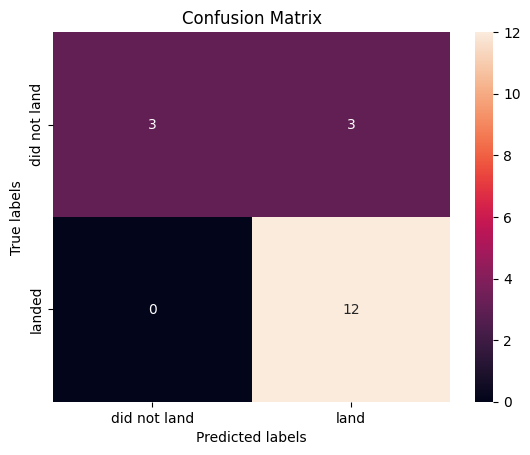

In [61]:
plot_confusion_matrix(Yk_test,yhatknn)

In [62]:
# Task 12

In [63]:
accu=[]
Method=[]

In [64]:
accu.append(logreg_cv.score(X_test, Y_test))
Method.append('logestic regression')
#-------------------------------------
accu.append(svm_cv.score(Xs_test, Ys_test))
Method.append('SVM')
#--------------------------------------
accu.append(tree_cv.score(Xt_test, Yt_test))
Method.append('Decission Tree')
#---------------------------------------
accu.append(knn_cv.score(Xk_test, Yk_test))
Method.append('KNN')

In [65]:
print(accu)
print(Method)

[0.8333333333333334, 0.9444444444444444, 0.8333333333333334, 0.8333333333333334]
['logestic regression', 'SVM', 'Decission Tree', 'KNN']


In [66]:
import matplotlib.pyplot as plt

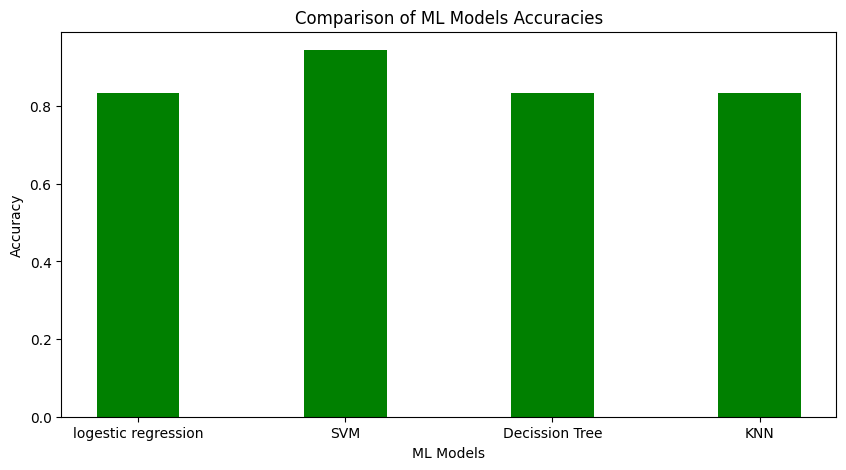

In [67]:
fig= plt.figure(figsize=(10,5))
plt.bar(Method, accu, width=0.4, color='g')
#plt.bar(Method, accu)
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models Accuracies')
plt.show()